#Linear Regression

Let us implement the Linear Regression from scratch. You may run the cells to visualize the results for yourself.

We begin with importing the necessary packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import math
plt.style.use('seaborn-whitegrid')
import numpy as np
import random

<ipython-input-1-29d9c14e05d8>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Regression from Scratch**

Let us generate our data randomly. We generate x-values using random number generator and obtain y-values using equation y = 2x - 5 + c. Let us also visualise the created data using a scatter plot.

complete the code:

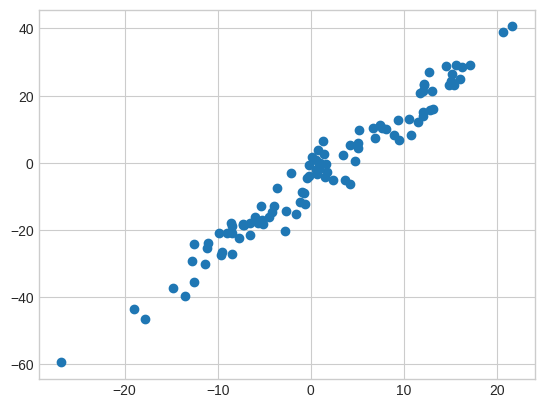

In [2]:
rng =  random.seed(1) # fixing the random number generator seed to reproduce the resuts
x = 10*np.random.randn(100)
y = 2*x-5+ np.random.normal(0,4, len(x))
plt.scatter(x,y)
plt.show()

In [3]:
x_train, y_train = x , y  # preparing data for training a model.

Let us find the data type of x_train variable.

In [4]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [ 6.66461726  1.57223987 17.08333835  9.35784891 -4.49464167]


In [5]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [ 10.23690684  -4.13943323  29.24134727  12.8904566  -16.23647037]


Lets us find out the shape of our x and y arrays

In [6]:
x_train_shape = x_train.shape
y_train_shape = y_train.shape
print ('The shape of x_train is:', x_train_shape)
print ('The shape of y_train is: ', y_train_shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (100,)
The shape of y_train is:  (100,)
Number of training examples (m): 100


**Computing the Cost Function**

Let us define the cost function to calculate the cost of a predicted output Ypred using the equation y = w*x + b, where (w,b) are variables and x is input.

The cost is calculated as : 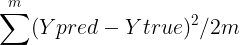

In [7]:
def compute_cost(x, y, w, b):
    m = x.shape[0]                        # number of training examples
    total_cost = 0
    cost=0
    for i in range(m):                    # iteratively calculating the cost for all saz
        f_wb = w*x[i]+b                           # calculate y value
        cost +=   (f_wb-y[i])**2                        # calculate loss

    total_cost = cost/(2*m)               # take final loss to be average of loss of every sample point


    return total_cost

Let us check out the cost function in action

In [8]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x,y,initial_w,initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w (zeros): 27.830


**Computing the Gradient**

Let us write a function to compute the gradient (slope) of our cost function along our variables. You must have come across the following equations while looking up the theory of linear regression. Here the red box is the gradients we are calculating now.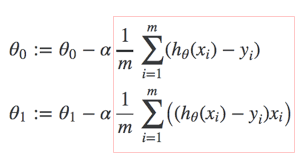

In [9]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i]+b
        dj_db +=  f_wb-y[i]
        dj_dw +=  (f_wb-y[i])*x[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

Let us check out our gradient function in action

In [10]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x,y,initial_w,initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -189.12055254808303 2.6681334964677257


**Applying Gradient Descent Algorithm from scratch**

Coming to the final part of integrating every part of code we have created, Let us implement the gradient descent algorithm

In [11]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(x)                                                             # number of training examples
    J_history = []                                                         # An array to store cost J and w's at each iteration — primarily for graphing later
    w_history = []
    w =  copy.deepcopy(w_in)                                         # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db =gradient_function(x, y, w, b)                       # Compute gradients

        w = w-(alpha*dj_dw)                                              # Move along the found gradient direction scaled by alpha / changing the values of w and b based on gradients
        b = b-(alpha*dj_db)
        cost = cost_function(x,y,w,b)                                          # Now find the new cost using the modified variables w, b using function defined before
        J_history.append(cost)

                                                                           # Print cost after every 10 iterations
        if i% math.ceil(num_iters/10) == 0:
            print ("w and b at each step :",w," and ",b)
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Let us see our implementation in ACTION

In [17]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,J_history,w_history = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

w and b at each step : 1.8912055254808302  and  -0.026681334964677256
Iteration    0: Cost    21.72   
w and b at each step : 1.9934126427080436  and  -4.162300715297046
Iteration  150: Cost     8.28   
w and b at each step : 2.006574056996146  and  -5.1048232158988265
Iteration  300: Cost     7.58   
w and b at each step : 2.009573140444714  and  -5.319595243401442
Iteration  450: Cost     7.55   
w and b at each step : 2.0102565397614276  and  -5.368535214349757
Iteration  600: Cost     7.54   
w and b at each step : 2.01041226554702  and  -5.379687135688267
Iteration  750: Cost     7.54   
w and b at each step : 2.010447750686828  and  -5.382228317203718
Iteration  900: Cost     7.54   
w and b at each step : 2.010455836663999  and  -5.382807374686139
Iteration 1050: Cost     7.54   
w and b at each step : 2.010457679210686  and  -5.3829393241615735
Iteration 1200: Cost     7.54   
w and b at each step : 2.0104580990706764  and  -5.382969391408085
Iteration 1350: Cost     7.54   
w,

Let us see what our regressed equation predicts for every x

In [18]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Visualizing our predictions(points on the straight line) against the actual y values. We see how our algorithm found a good fitting line through our data samples.

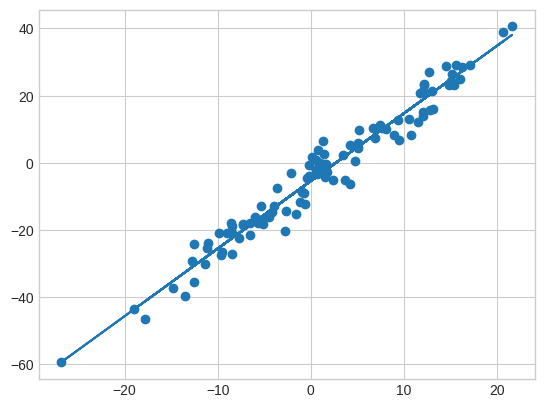

In [19]:
# Plot the linear fit
plt.plot(x_train, predicted)
plt.scatter(x_train, y_train)
# Set the title
# Set the y-axis label
# Set the x-axis label
plt.show()

**Linear Regression Using Scikit-Learn**


We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, incorporating our previous implementation all in a few lines of code.

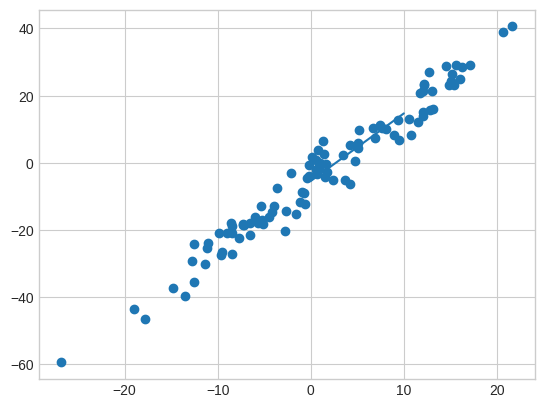

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)                 # This fits the line to the same data we used earlier

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])      # This is used to get the predictions

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [21]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0104582229787806
Model intercept: -5.382978264783965


We see that the results are very close to the values used to generate the data, as we might hope.

**Optional-Material**

Linear Regression in MultiDimension

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [22]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.